In [ ]:
#default_exp nb_01

# Impractical Deep Learning for Coders Lesson 1, Matrix Multiplication (part 1)
> Implementing matrix multiplication from scratch

The game: Recreate fastai, while only being able to use:

- Python
- Python stdlib
- Non-data science modules
- PyTorch array creation, RNG, and indexing
- `datasets`
- matplotlib

The game I will also be playing:

- Do this while also trying experimental note annotation
- Would I have done a different decision in implementing something than Jeremy has? If so, **do it!**
- **No `import *`**

> The difference between effective people in Deep Learning and the rest is who can make things in code that can work properly, and there's very few of those people - Jeremy Howard

3 steps to training a really good model:

1. Overfit a model -- validation error increases
2. Reduce overfitting
3. There is no step 3 -- jk, experiment and toy with

How to avoid overfitting from A -> F

1. Get more data
2. Perform more data augmentation
3. Use a more generalizable architecture
4. Try adding regularization (DropOut, wd)
5. Reduce architecture complexity

4 & 5 both have the least impact, start with the first 3

In [1]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
from fastcore.test import test_eq, test_close

from fastdownload import FastDownload

First we need to download the dataset we are using, which will be MNIST

In [ ]:
#export
MNIST_URL = "https://figshare.com/ndownloader/files/25635053"

#### Code

In [2]:
url = "https://figshare.com/ndownloader/files/25635053"
fd = FastDownload(base="~/.fastai")

In [3]:
path = fd.download(url); path

Path('/home/zach/.fastai/archive/25635053')

#### Explanation


In [4]:
{
    "https://figshare.com/ndownloader/files/25635053": "deeplearning.net is no longer up, so we use a version of Yann LeCun's dataset",
    "FastDownload(base='~/.fastai')": "We utilize fastdownload's `FastDownload` class to handle the downloading of the data. `from fastai import datasets` is no longer a thing.",
    "fd.download(url)": "Perform the actual downloading"
};

In [5]:
with gzip.open(path, 'rb') as f:
    ((x_train,y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

The downloaded data contains `numpy` arrays, which are not allowed so they must be converted to tensors

#### Code

In [6]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape

In [7]:
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

#### Explanation

In [8]:
{
    "map(tensor, (x_train,y_train,x_valid,y_valid))": "Applys `torch.tensor` across the four arrays, converting them all into tensors",
    "n,c = x_train.shape": "`n` = the number of rows in the training set, `c` = the number of columns in the training set"
};

#### Code

In [9]:
assert n==y_train.shape[0]==50000
test_eq(c, 28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

#### Explanation

In [10]:
{
    "assert n==y_train.shape[0]==50000": "Verify there are 50,000 items in the dataset",
    "test_eq(c, 28*28)": "Verify that each item is 28x28 numbers",
    "test_eq(y_train.min(),0)": "Verify the lowest class in the y labels is 0",
    "test_eq(y_train.max(),9)": "Verify the highest class in the y labels is 9"
};

#### Code

In [11]:
mpl.rcParams["image.cmap"] = 'gray'
img = x_train[0]
assert img.view(28,28).type() == 'torch.FloatTensor'

#### Explanation

In [12]:
{
    "img = x_train[0]": "Get one set of data from the dataset",
    "img.view(28,28).type()": "Check after viewing it as a 28,28 (more on this next) that the type is still a FloatTensor"
};

#### Code

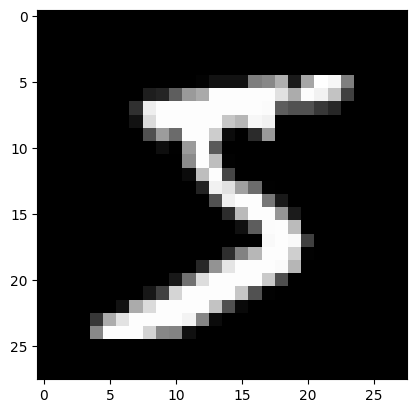

In [13]:
plt.imshow(img.view((28,28)));

#### Explanation

In [14]:
{
    "img.view((28,28))": "Reshape our 168 long vector into a 28x28 matrix"
};

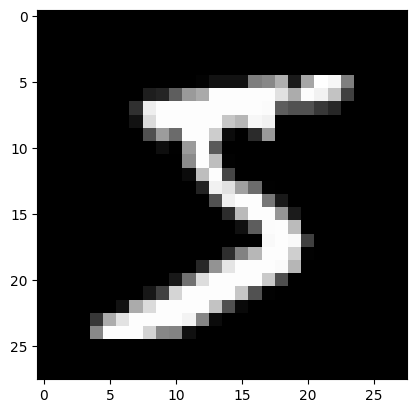

In [15]:
#hide_input
plt.imshow(img.view((28,28)));

## Initial python model

Create a simple linear model, of something akin to `y=ax+b`

#### Code

In [16]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

#### Explanation

In [17]:
{
    "torch.randn(784,10)": "This operates as `a`, a 784x10 matrix where 784==length of the array, 10==num going out",
    "torch.zeros(10)": "The bias will just start as 10 zeros"
};

### Matrix Multiplication

Core of the basic of machine learning, "affine functions".

[Cool website to visualize](https://matrixmultiplication.xyz)

#### Code

In [18]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

#### Explanation

In [19]:
{
    "(a,b)": "`a` and `b` are two matricies which should be multiplied",
    "assert ac==br": "Matrix multiplication cannot occur unless the number of columns in `a` aligns with the number of rows in `b`",
    "c":"`c` is the resulting matrix, which has a shape of `a`'s rows and `b`'s columns",
    "for i in range(ar):": "Loop of matrix B as a whole scrolling down matrix A *sideways*, imagine going row by row like a curtain coming down slowly",
    "for j in range(bc):": "Loop of each column in matrix B at each row in matrix A",
    "for k in range(ac):": "The actual loop of multiplying and adding (matrix multiplication)",
    "c[i,j] += a[i,k] * b[k,j]": "The actual multiplication being performed"
};

#### Code

In [20]:
m1 = x_valid[:5]
m2 = weights

#### Explanation

In [21]:
{
    "m1": "Five rows of the validation set",
    "m2": "Weight matrix"
};

In [22]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [23]:
%time t1=matmul(m1, m2)

CPU times: user 440 ms, sys: 72.4 ms, total: 513 ms
Wall time: 421 ms


In [24]:
t1.shape # 5 row, 10 col output

torch.Size([5, 10])

In [25]:
len(x_train)

50000

This is quite slow. To do a single epoch it would take ~20,000 seconds on the computer I'm using to take notes. (50,000 on Jeremy's).

This is also why we don't write things in Python. It's **unreasonably slow**. 

New goal, can we speed this up 50,000 times

### Elementwise operations

To speed things up, start with the innermost loop and make things just a little bit faster

> The way to make Python faster is to remove python - Jeremy Howard

EWO's include (+,-,*,/,>,<,==)

Example with two tensors:

In [26]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [27]:
a+b

tensor([12., 14.,  3.])

We performed `c[0] = a[0]+b[0]`, `c[1] = a[1] + b[1]`, ...

#### Code

In [28]:
c = (a < b)
c = c.float().mean()

#### Explanation

In [29]:
{
    "c = (a < b)": "We performed `c[0] = a[0]< b[0]`, `c[1] = a[1] < b[1]`, ...",
    "c":"This becomes a boolean array of `[False, True, True]`, having an average of 2/3's"
};

In [30]:
c

tensor(0.6667)

Also known as what percentage of a is less than b. We could also perform the same on a rank 2 tensor (a tensor that has 2 dimensions), aka a matrix!

In [31]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

> Note: We only convert the first number to a float as PyTorch will realize this and cast the rest as a float

Frobenius norm:

*I have no idea what this is/remember what this is*

$$\|A\|_F=\left(\sum_{i, j=1}^n\left|a_{i j}\right|^2\right)^{1 / 2}$$



#### Code

In [32]:
n = torch.clone(m) # For readability
(m*n).sum().sqrt()

tensor(16.8819)

#### Explanation

In [112]:
{
    "i": "$$\\text{This is the first for loop, and goes from 1 }\\rightarrow\\text{ n}$$",
    "j": "$$\\text{This is the second for loop, and goes from 1 }\\rightarrow\\text{ n as well}$$",
    "m*n":"$$\\text{This correlates to }\left|a_{i j}\\right|$$",
    ".sum()": "$$\\text{This aligns with }\sum_{i, j=1}^n\\text{, which is equivalent to a product combination of }\sum_{i \mathop =1}^m and \sum_{j \mathop =1}^n$$",
    ".sqrt()": "$$\\text{This correlates to the 1/2 power, simplified as 'result' }\left(\\text{result}\\right)^{1 / 2}$$"
};

In [34]:
#hide_input
# Editors note: If you have \r in the latex, use \\r
(m*n).sum().sqrt()

tensor(16.8819)

### Elementwise Matrix Multiplication (rendition 2!)

#### Code

In [35]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

#### Explanation

In [36]:
{
    "c[i,j] = (a[i,:] * b[:,j]).sum()": "$$\\text{We replace the entire innermost for loop with this, and directly perform the matrix operation.}\\newline\\text{Remember that : selects everything from i}\\rightarrow\\text{end! (Or the entirety of that axis)}$$",
    "a[i,:]": "We select all of row `i`",
    "b[:,j]": "And we select all of column `j`."
};

In numpy and PyTorch it goes 🎵 row by column 🎵

In [37]:
%timeit -n 10 _=matmul(m1,m2)

570 µs ± 21.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
445/.727

612.1045392022008

We are now 600x faster by removing a single loop by running it in c

In [42]:
test_close(t1, matmul(m1,m2), eps=1e-4)

### Broadcasting

Now we need to get rid of the second-most inner loop through *broadcasting*.

Get rid of all for loops and replace with implicit broadcasted loops

#### Broadcasting with a scalar

In [43]:
a

tensor([10.,  6., -4.])

In [44]:
a > 0

tensor([ True,  True, False])

We just *broadcast* `a > 0`. Also known as, the float turns into `[0,0,0]` and an element-wise operation is performed, and is done at either C or CUDA speed depending on the device

#### Broadcast a vector to a matrix

In [45]:
d = tensor([10.,20,30]); d

tensor([10., 20., 30.])

In [46]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [47]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([]))

In [48]:
m + d

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

By the rules we have so far, we'd expect this to not actually do anything. But instead it broadcast the tensor *horizontally* row by row adding the vector to the matrix

#### Code

In [49]:
t = d.expand_as(m)

#### Explanation

In [50]:
{
    ".expand_as":"Shows what a tensor (d) would look like if it were broadcast to m"
};

In [51]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [52]:
t.storage()

 10.0
 20.0
 30.0
[torch.storage._TypedStorage(dtype=torch.float32, device=cpu) of size 3]

This shows us that it's only storing one copy of `t`, and not a 3x3 copy of `t`

In [53]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

How to read this:

When going row by row, it should take *zero* steps through the memory/storage. And when going column by column, it should take **one** step.

This in turn is how it repeats 10,20,30 for every single row. 

We can create tensors that behave like tensors much bigger than what they are.

What if we wanted to take a column instead of a row? In other words, a rank 2 tensor of shape (3,1)

#### Code

In [54]:
d.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

#### Explanation

In [55]:
{
    ".unsqueeze(1)":"Adds an additional dimension of 1 to wherever we ask for one"
};

In [56]:
d.shape

torch.Size([3])

In [57]:
d.unsqueeze(0)

tensor([[10., 20., 30.]])

`d` would have a shape of `(1,3)` which changed from just `(3)` by adding a dimension at position `0`.

In [58]:
d.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

`d` would have a shape of `(3,1)` which changed from just `(3)` by adding a dimension at position `1`.

In [59]:
#d.unsqueeze(2)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

This fails because we only have a 1d tensor not a 2d tensor. E.g.:

In [60]:
torch.tensor([[1,2,3],[4,5,6]]).unsqueeze(2)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]])

In [61]:
d.shape, d.unsqueeze(0).shape, d.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

#### Code

In [62]:
d.shape, d[None,:].shape, d[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

#### Explanation

In [63]:
{
    "d[None,:], d[:,None]": "PyTorch and numpy will use this notation to squeeze in a dimension at index `None`, equivalent to unsqueeze()",
    "d[None,:]": "This is equivalent to `d.unsqueeze(0)`",
    "d[:,None]": "This is equivalent to `d.unsqueeze(1)`"
};

In [64]:
#hide_input
d.shape, d[None,:].shape, d[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

This also works with *multiple* axes:

In [65]:
d[None,None,:].shape

torch.Size([1, 1, 3])

You can always skip trailing :'s, and '...' means 'all preceding dimensions':

In [66]:
d[None].shape, d[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

#### Code

In [67]:
d[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

#### Explanation

In [68]:
{
    "d[:,None]": "Adds a dimension on the last axis, turning `d` into [10],[20],[30]",
    ".expand_as(m)": "When we expand now, the result will be a lateral expansion rather than vertical"
};

In [69]:
d[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [70]:
m + d[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

From here, we visualize this in excel. Follow the timestamp [here](https://youtu.be/4u8FxNEDUeg?list=PLfYUBJiXbdtTIdtE1U8qgyxo4Jy2Y91uj&t=3626)

### matmul with broadcasting

With this information now, we can use this to get rid of the loop:

#### Code

In [75]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        # c[i,j] = (a[i,:] * b[:,j]).sum() previous
        c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0)
        # This is equivalent to c[i,:]
        # Rewritten in None form:
        #c[i] = (a[i][:,None] * b).sum(dim=0)
        # Rewritten again to avoid second index altogether:
        #c[i] = (a[i,:,None] * b).sum(dim=0)
    return c

#### Explanation

In [76]:
{
    "a[i].unsqueeze(-1)": "This takes `a` at `i` and expands its last dimension by 1, and now it's a rank 2 tensor",
    "* b": "This newly reshaped array can then be multiplied by b properly without issue",
    ".sum(dim=0)": "And finally we can take the sum of that result, doing so on the first dimension"
};

In [77]:
m2*m1[0].unsqueeze(-1)

tensor([[-0., 0., 0.,  ..., 0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        ...,
        [-0., 0., -0.,  ..., -0., 0., -0.],
        [-0., 0., -0.,  ..., 0., -0., -0.],
        [0., 0., 0.,  ..., 0., -0., -0.]])

In [78]:
m1[0,:,None] * m2

tensor([[-0., 0., 0.,  ..., 0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        ...,
        [-0., 0., -0.,  ..., -0., 0., -0.],
        [-0., 0., -0.,  ..., 0., -0., -0.],
        [0., 0., 0.,  ..., 0., -0., -0.]])

In [79]:
m1[0].unsqueeze(-1).shape

torch.Size([784, 1])

In [80]:
assert m1[0].unsqueeze(-1).shape == m1[0][:,None].shape == m1[0,:,None].shape == m1[0,None].T.shape

In [81]:
%timeit -n 10 _=matmul(m1,m2)

202 µs ± 66.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:
445/.157

2834.394904458599

We are now more than 2000x faster!

In [84]:
test_close(t1, matmul(m1,m2), eps=1e-4)

### Broadcasting Rules

In [87]:
d

tensor([10., 20., 30.])

In [88]:
# Pad a dimension
d[None,:], d[None,:].shape

(tensor([[10., 20., 30.]]), torch.Size([1, 3]))

In [89]:
# Pad the last dimension
d[:,None].shape

torch.Size([3, 1])

In [90]:
# Perform matmul
d[None,:] * d[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [93]:
# Peform broadcast
d[None] > d[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

### Einstein Summation

Recall the inner most part of the for loops earlier:

```python
c[i,j] += a[i,k] * b[k,j]
```

And when we removed this, it looked like so:
```python
c[i,j] = (a[i,:] * b[:,j]).sum()
```

We can rewrite this in Einstein Summation using the following steps:

1. Get rid of the names of everything and the operators

```python
i,j += i,k k,j
```

2. Move `i,j` to the end and make an arrow point at it:

```python
i,k k,j -> i,j
```

3. Get rid of the commas:

```python
ik kj -> ij
```

4. Replace spaces with commas:

```python
ik,kj->ij
```

#### Code

In [1]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

#### Explaination

In [94]:
{
    "->": "To the left of the arrow is the input, to the right of the arrow is the output",
    "ik,kj": "Inputs are delimited by comma, so there are two in this case",
    "ik":"Rank is denoted by the number of letters there are. `ik` and `kj` are both rank 2",
    "kj":"These inputs are read (shape wise) as `k` by `j` or `i` by `k`",
    "k":"When a letter is repeated across inputs, it is assumed to be a dot product along that dimension",
};

In [100]:
%timeit -n 10 _=matmul(m1,m2)

101 µs ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### pytorch op

Since we have now explored matmul to it's fullest extent, we can utilize pytorch's operator directly for matrix multiplication:

In [101]:
%timeit -n 10 t2 = m1.matmul(m2)

The slowest run took 19.75 times longer than the fastest. This could mean that an intermediate result is being cached.
13.1 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


The matmul is pushed to a BLAS (basic linear algebra subprogram) cuBLAS for nvidia, ex. This is what the M1 has for example and how they entered the space.

matmul is so common and useful that it has it's own operator, `@`:

In [103]:
t2 = m1@m2

In [104]:
test_close(t1,t2)

This is the exact same speed as `m1.matmul(m2)`

# Export - 

In [109]:
from nbdev.export import notebook2script
notebook2script("matmul.ipynb")

Converted matmul.ipynb.
